# Monitor meeting spike day

This notebooks plots a day of 'typical' meeting spike observations of CO2 concetrations in the Large (B) meeting room.

Date: 06/04/2024

* _Input:_ Exported .csv from Atal logged files.
* _Output:_ Saves a plot in .png format to disk

**Tasks:** 
* Loads the .csv files
* Removes irrelevant sensor data
* Plots the C02 concentrations in a timeframe

## Metadata

* **Master**: Master Information Studies: Information Systems (track)
* **University**: University of Amsterdam (UvA)
* **Institute**: Informatics Institute
* **Faculty**: Faculty of Science (FNWI)
* **Research Group**: Digital Interactions Lab (DIL)
* **Student**: BSc Danny de Vries (14495643)
* **Supervisor**: Dr. H. (Hamed) Seiied Alavi PhD

[Viszlab](https://www.viszlab.github.io) © 2024 by [Danny de Vries](https://wwww.github.com/dandevri) is licensed under [CC BY-NC-SA 4.0](http://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1).

## Prequisites

This notebooks needs a sufficient Python version (>=3.6) to run and requires some packages and libraries for analysis and visualization. The following code checks if your installed Python version is compatible, installs the necessary packages and imports the packages into the notebook.

### Check Python installation

In [2]:
from packaging import version
import platform
import sys

min_version = '3.8'

def check_version(min_version):
    current_version = sys.version.split()[0]
    return version.parse(current_version) >= version.parse(min_version)

# Example usage:
if __name__ == "__main__":
    if check_version(min_version):
        print("Running a sufficiently new version of Python.")
        print("Current version: " + platform.python_version())
        print("Minimum required version: " + min_version)
    else:
        print("Python version is too old. Upgrade to a newer version.")

Running a sufficiently new version of Python.
Current version: 3.9.12
Minimum required version: 3.8


### Install the required packages

In [3]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install numpy

### Import the packages into the project

In [4]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

## Clean-up

### Load the full CSV

In [5]:
def import_csv(file):
    df = pd.read_csv(file)
    return df

file = 'monitor-data/room-b_monitor_full_data.csv'

full_data = import_csv(file)

print(full_data);

              Date and time   Temperature °C    RH %   DewPoint °C   CO2 ppm
0       25/03/2024 12:52:15           20.818  38.983         6.372     580.0
1       25/03/2024 12:52:30           20.838  39.496         6.579     580.0
2       25/03/2024 12:52:45           20.858  34.900         4.817     580.0
3       25/03/2024 12:53:00           20.868  33.954         4.434     580.0
4       25/03/2024 12:53:15           20.878  35.327         5.009     580.0
...                     ...              ...     ...           ...       ...
104053  12/04/2024 14:25:30           21.331  46.149         9.304     553.0
104054  12/04/2024 14:25:45           21.341  46.149         9.313     553.0
104055  12/04/2024 14:26:00           21.341  46.149         9.313     556.0
104056  12/04/2024 14:26:15           21.331  46.167         9.310     556.0
104057  12/04/2024 14:26:30           21.341  46.149         9.313     556.0

[104058 rows x 5 columns]


### Remove irrelevant rows

Remove rows the other sensory data irrelevant for this analysis.

In [6]:
def filter_columns(data):
    data.columns = data.columns.str.strip()
    filtered_df = data[['Date and time', 'CO2 ppm']]
    return filtered_df

filtered_data = filter_columns(full_data)
print(filtered_data)

              Date and time  CO2 ppm
0       25/03/2024 12:52:15    580.0
1       25/03/2024 12:52:30    580.0
2       25/03/2024 12:52:45    580.0
3       25/03/2024 12:53:00    580.0
4       25/03/2024 12:53:15    580.0
...                     ...      ...
104053  12/04/2024 14:25:30    553.0
104054  12/04/2024 14:25:45    553.0
104055  12/04/2024 14:26:00    556.0
104056  12/04/2024 14:26:15    556.0
104057  12/04/2024 14:26:30    556.0

[104058 rows x 2 columns]


### Filter one relevant date and opening hours

In [7]:
df = filtered_data;

# Convert 'Date and time' column to datetime type
df['Date and time'] = pd.to_datetime(df['Date and time'], format='%d/%m/%Y %H:%M:%S')

# Filter the dataframe to keep only the records with the date '06/04/2024'
filtered_df = df[df['Date and time'].dt.strftime('%d/%m/%Y') == '05/04/2024']

# Further filter to keep only records between 8 am and 10 pm
filtered_df = filtered_df[(filtered_df['Date and time'].dt.hour >= 7) & (filtered_df['Date and time'].dt.hour < 23)]

print(filtered_df)

/var/folders/g8/85cbmx4x789d0579p3qt0xsm0000gn/T/ipykernel_35256/2535825791.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date and time'] = pd.to_datetime(df['Date and time'], format='%d/%m/%Y %H:%M:%S')


            Date and time  CO2 ppm
61951 2024-04-05 07:00:00    423.0
61952 2024-04-05 07:00:15    418.0
61953 2024-04-05 07:00:30    418.0
61954 2024-04-05 07:00:45    418.0
61955 2024-04-05 07:01:00    418.0
...                   ...      ...
65786 2024-04-05 22:58:45    430.0
65787 2024-04-05 22:59:00    430.0
65788 2024-04-05 22:59:15    430.0
65789 2024-04-05 22:59:30    430.0
65790 2024-04-05 22:59:45    430.0

[3840 rows x 2 columns]


### Split into seperate columns

In [8]:
df = filtered_df;

# Convert 'Date and time' column to string type
df['Date and time'] = df['Date and time'].astype(str)

# Split 'Date and time' column into separate 'Date' and 'Time' columns
df[['Date', 'Time']] = df['Date and time'].str.split(' ', 1, expand=True)

# Drop the original 'Date and time' column if not needed anymore
df.drop(columns=['Date and time'], inplace=True)

print(df)

       CO2 ppm        Date      Time
61951    423.0  2024-04-05  07:00:00
61952    418.0  2024-04-05  07:00:15
61953    418.0  2024-04-05  07:00:30
61954    418.0  2024-04-05  07:00:45
61955    418.0  2024-04-05  07:01:00
...        ...         ...       ...
65786    430.0  2024-04-05  22:58:45
65787    430.0  2024-04-05  22:59:00
65788    430.0  2024-04-05  22:59:15
65789    430.0  2024-04-05  22:59:30
65790    430.0  2024-04-05  22:59:45

[3840 rows x 3 columns]


/var/folders/g8/85cbmx4x789d0579p3qt0xsm0000gn/T/ipykernel_35256/3586874538.py:7: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Date', 'Time']] = df['Date and time'].str.split(' ', 1, expand=True)


### Plot the CO2 distribution

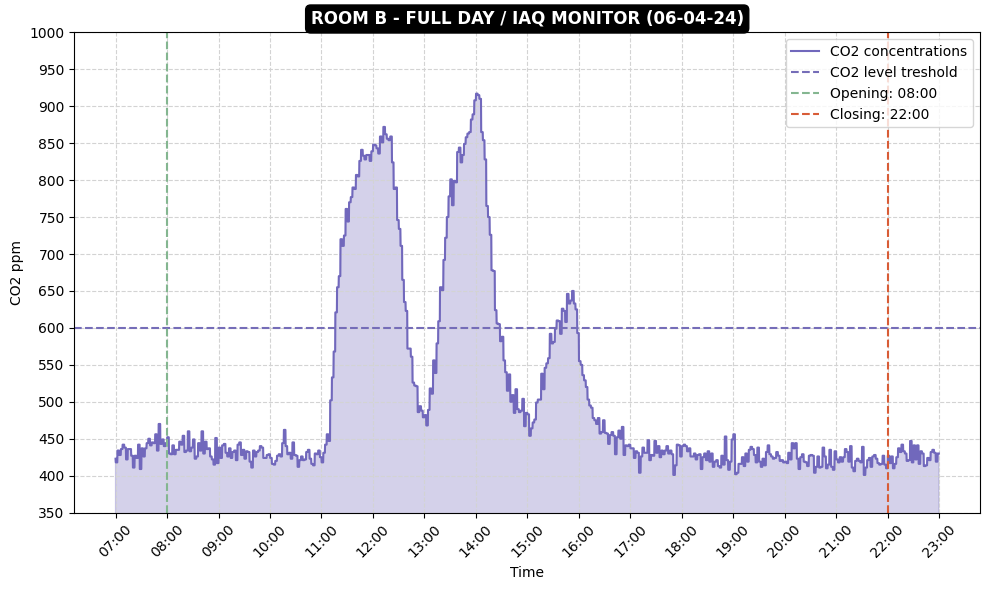

In [9]:
filtered_data = df;

# Convert 'Date' and 'Time' columns to datetime type
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Plot the DataFrame
plt.figure(figsize=(10, 6))
plt.plot(df['Datetime'], df['CO2 ppm'], linestyle='-', color='#7168bc', label='CO2 concentrations')
title = plt.title('Room B - Full day / IAQ Monitor (06-04-24)'.upper(), fontweight="bold" )
title.set_position([.5, 0.6])  # Adjust the title position
title.set_color('white')  # Set title text color to white
title.set_bbox(dict(facecolor='black', edgecolor='black', boxstyle='round,pad=0.3'))  # Set title background color to black
plt.xlabel('Time')
plt.ylabel('CO2 ppm')
plt.xticks(rotation=45)
# Format x-axis to show only time
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))

# Fill the area under the line plot
plt.fill_between(df['Datetime'], df['CO2 ppm'], color='#7168bc', alpha=0.3)

# Draw horizontal line at 600 CO2 level mark
plt.axhline(y=600, color='#756db8', linestyle='--', label='CO2 level treshold')

# Add vertical lines at 08:00 and 22:00
plt.axvline(x=df[df['Time'] == '08:00:00']['Datetime'].iloc[0], color='#84b690', linestyle='--', label='Opening: 08:00')
plt.axvline(x=df[df['Time'] == '22:00:00']['Datetime'].iloc[0], color='#d85c36', linestyle='--', label='Closing: 22:00')

# Set y-axis limits and ticks
plt.ylim(350, 1000)
plt.yticks(np.arange(350, 1001, 50))


plt.grid(True, linestyle='--', color='lightgrey')
plt.tight_layout()
plt.legend(loc='upper right')  # Move legend to the top right

# Save the chart to disk
plt.savefig('monitor-charts/room-b-monitor-meeting-spike-day.png', dpi=300, bbox_inches='tight')

plt.show()